# Thinplate

In [1]:
from IPython import get_ipython
if get_ipython():
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections
import scipy

import latenta as la
la.logger.setLevel("INFO")

## Grid random walks


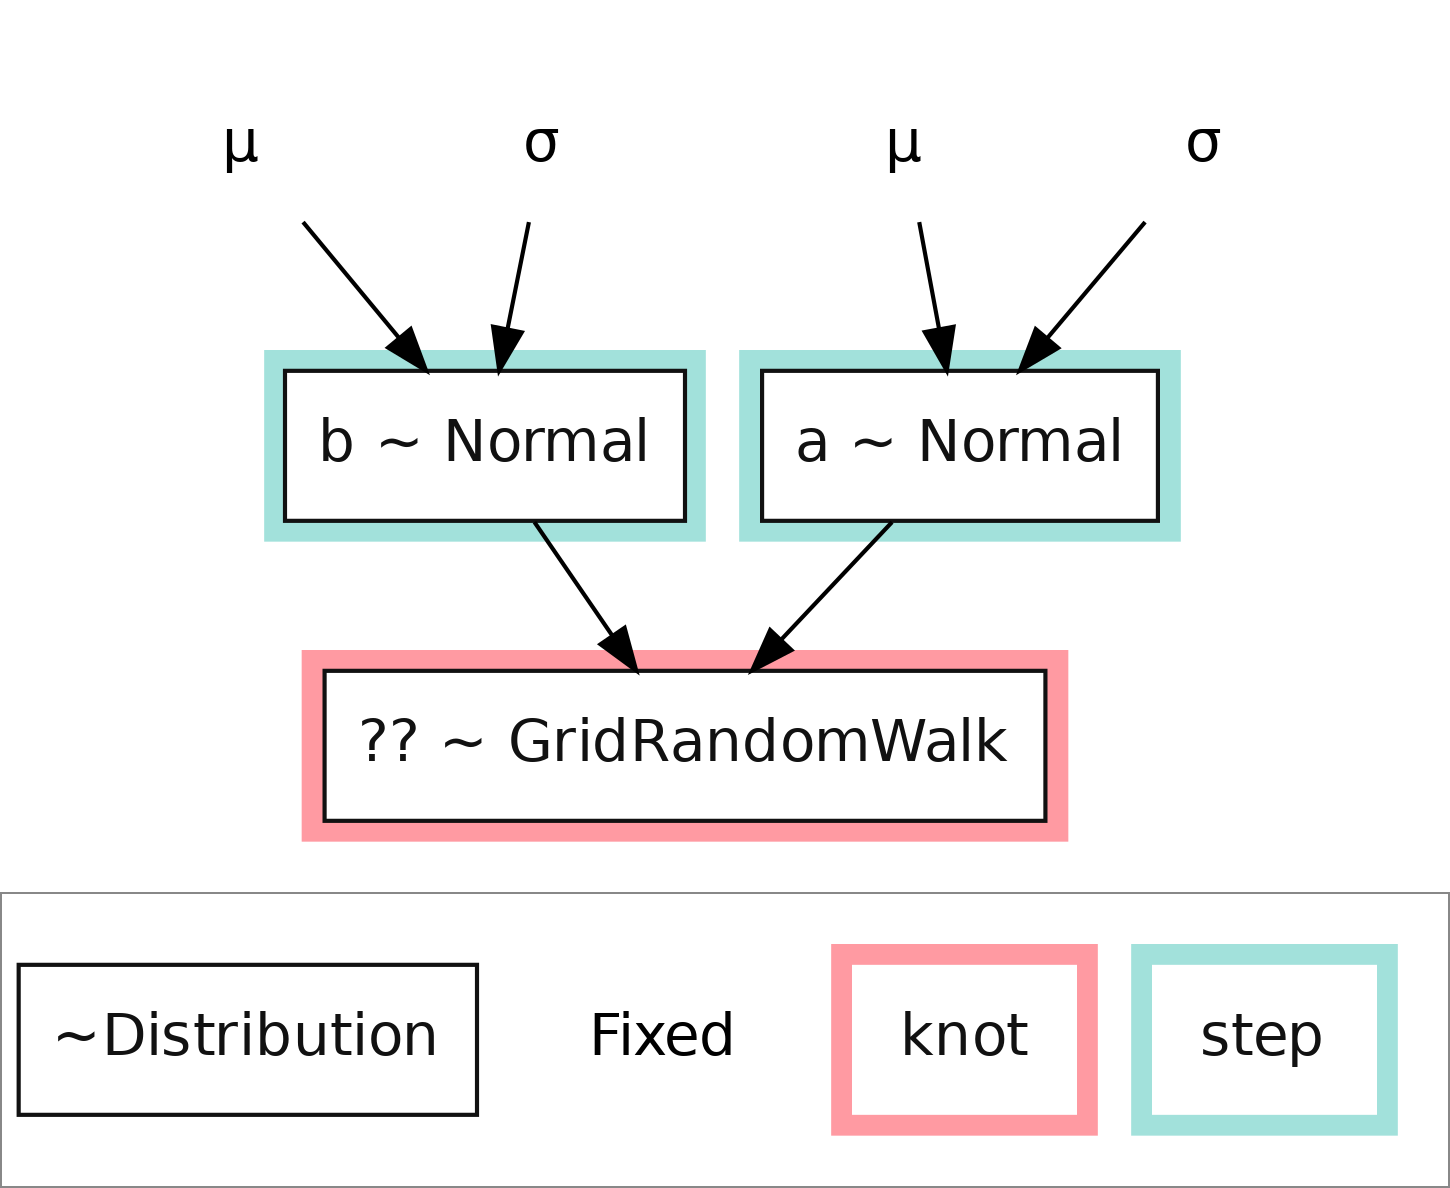

In [2]:
dist = la.distributions.GridRandomWalk(
     {"a":la.distributions.Normal(), "b":la.distributions.Normal()},
    n_knots = [10, 5],
    circular = [False, False])
dist.plot()

tensor([ 0.0000,  1.2356,  2.0978,  1.5841,  2.3213, -0.6083,  1.0845,  1.0910,
         1.8462,  1.4139, -1.4808,  0.6582,  1.7062,  1.2260,  0.2410, -1.8744,
         0.7390, -0.9920,  1.5101, -0.9429, -1.3386, -0.5568, -0.5886,  2.3463,
        -1.1648, -1.8460,  0.0544,  0.0941,  2.5722,  0.4408, -1.4398, -1.0324,
        -1.0869,  1.3534,  0.9450, -2.7043, -3.2898,  1.9459,  7.0630,  7.5175,
        -4.0895, -4.9344,  0.4780,  3.4530,  1.6715, -4.6529, -3.1804,  3.4031,
         4.1151,  1.6321])
tensor([-282.9285])


<AxesSubplot:>

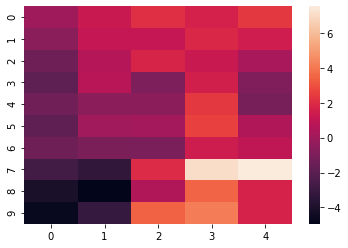

In [3]:
dist.reset_recursive()
dist.run_recursive()
print(dist.value)
print(dist.likelihood)
sns.heatmap(dist.value.reshape(dist.n_knots).cpu().numpy())

In [4]:
knots = torch.zeros(dist.n_knots)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
print(likelihood/np.log(scipy.stats.norm().pdf(0.)))
assert likelihood/np.log(scipy.stats.norm().pdf(0.)) == 85

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([85.])


In [5]:
knots = torch.arange(dist.n_knots[0]).repeat(dist.n_knots[1], 1).T + \
    torch.arange(dist.n_knots[1]).repeat(dist.n_knots[0], 1)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
print(likelihood/np.log(scipy.stats.norm().pdf(1.)))
assert likelihood/np.log(scipy.stats.norm().pdf(1.)) == 85

tensor([[ 0,  1,  2,  3,  4],
        [ 1,  2,  3,  4,  5],
        [ 2,  3,  4,  5,  6],
        [ 3,  4,  5,  6,  7],
        [ 4,  5,  6,  7,  8],
        [ 5,  6,  7,  8,  9],
        [ 6,  7,  8,  9, 10],
        [ 7,  8,  9, 10, 11],
        [ 8,  9, 10, 11, 12],
        [ 9, 10, 11, 12, 13]])
tensor([85.])


In [6]:
knots = torch.arange(dist.n_knots[0]).repeat(dist.n_knots[1], 1).T * 2 + \
    torch.arange(dist.n_knots[1]).repeat(dist.n_knots[0], 1)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
expected_steps = np.hstack([np.repeat(1., dist.n_knots[0] * (dist.n_knots[1] - 1)), np.repeat(2., dist.n_knots[1] * (dist.n_knots[0] - 1))])
expected_likelihood = np.log(scipy.stats.norm().pdf(expected_steps)).sum()
    
assert np.isclose(likelihood, expected_likelihood)

tensor([[ 0,  1,  2,  3,  4],
        [ 2,  3,  4,  5,  6],
        [ 4,  5,  6,  7,  8],
        [ 6,  7,  8,  9, 10],
        [ 8,  9, 10, 11, 12],
        [10, 11, 12, 13, 14],
        [12, 13, 14, 15, 16],
        [14, 15, 16, 17, 18],
        [16, 17, 18, 19, 20],
        [18, 19, 20, 21, 22]])


----

In [7]:
genes = la.Dim(pd.Series(range(100), name = "gene").astype(str))


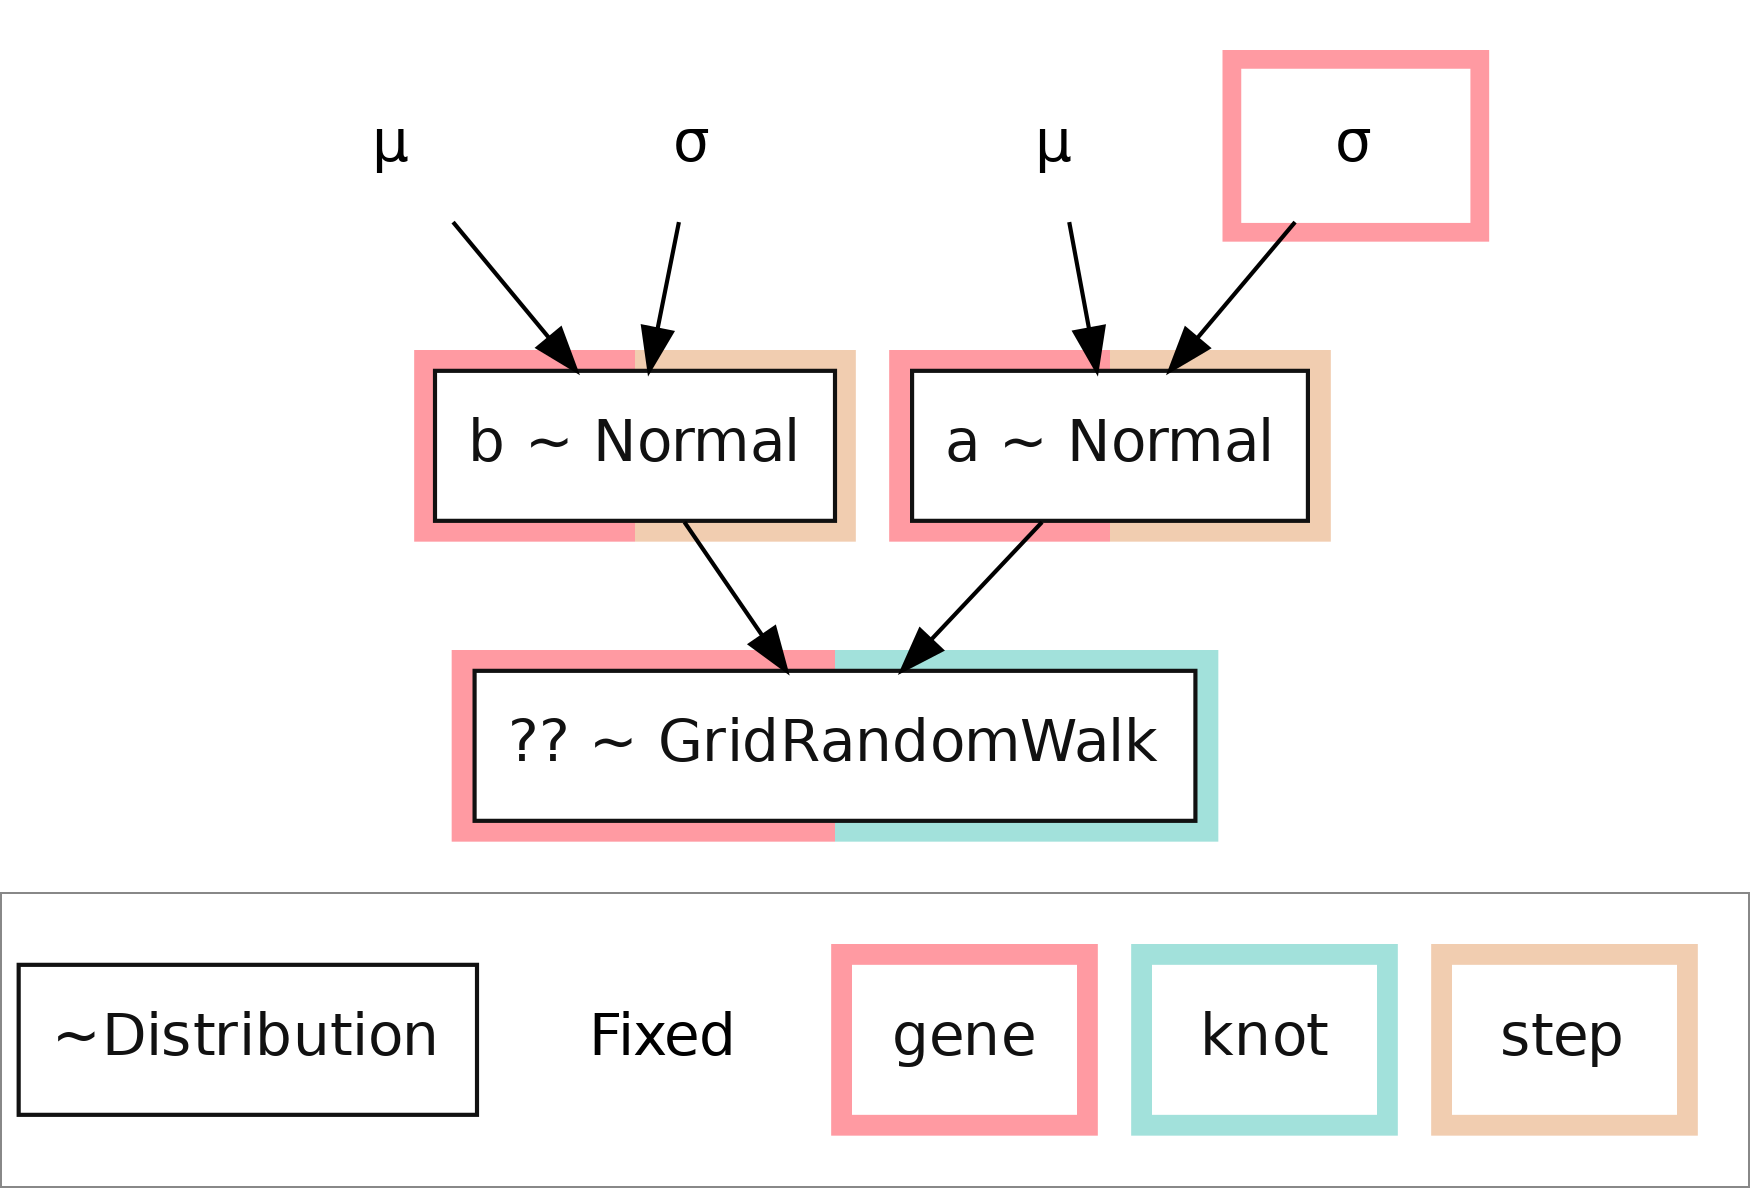

In [8]:
dist = la.distributions.GridRandomWalk(
    {
        "a":la.distributions.Normal(scale = la.Fixed(pd.Series(np.arange(len(genes)) / 10 + 1, index = genes.index).astype(float))),
        "b":la.distributions.Normal()
    },
    n_knots = [10, 5],
    circular = [False, False]
)
dist.plot()

In [9]:
dist.reset_recursive()
dist.run_recursive()

<AxesSubplot:>

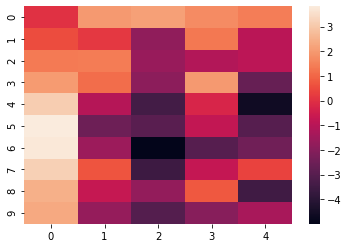

In [10]:
sns.heatmap(dist.value.reshape((len(genes), ) + tuple(dist.n_knots)).cpu().numpy()[0])

<AxesSubplot:>

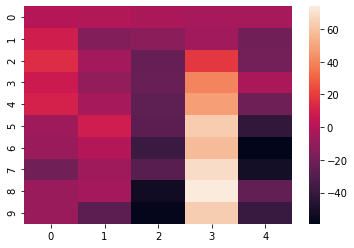

In [11]:
sns.heatmap(dist.value.reshape((len(genes), ) + tuple(dist.n_knots)).cpu().numpy()[-1])

-----


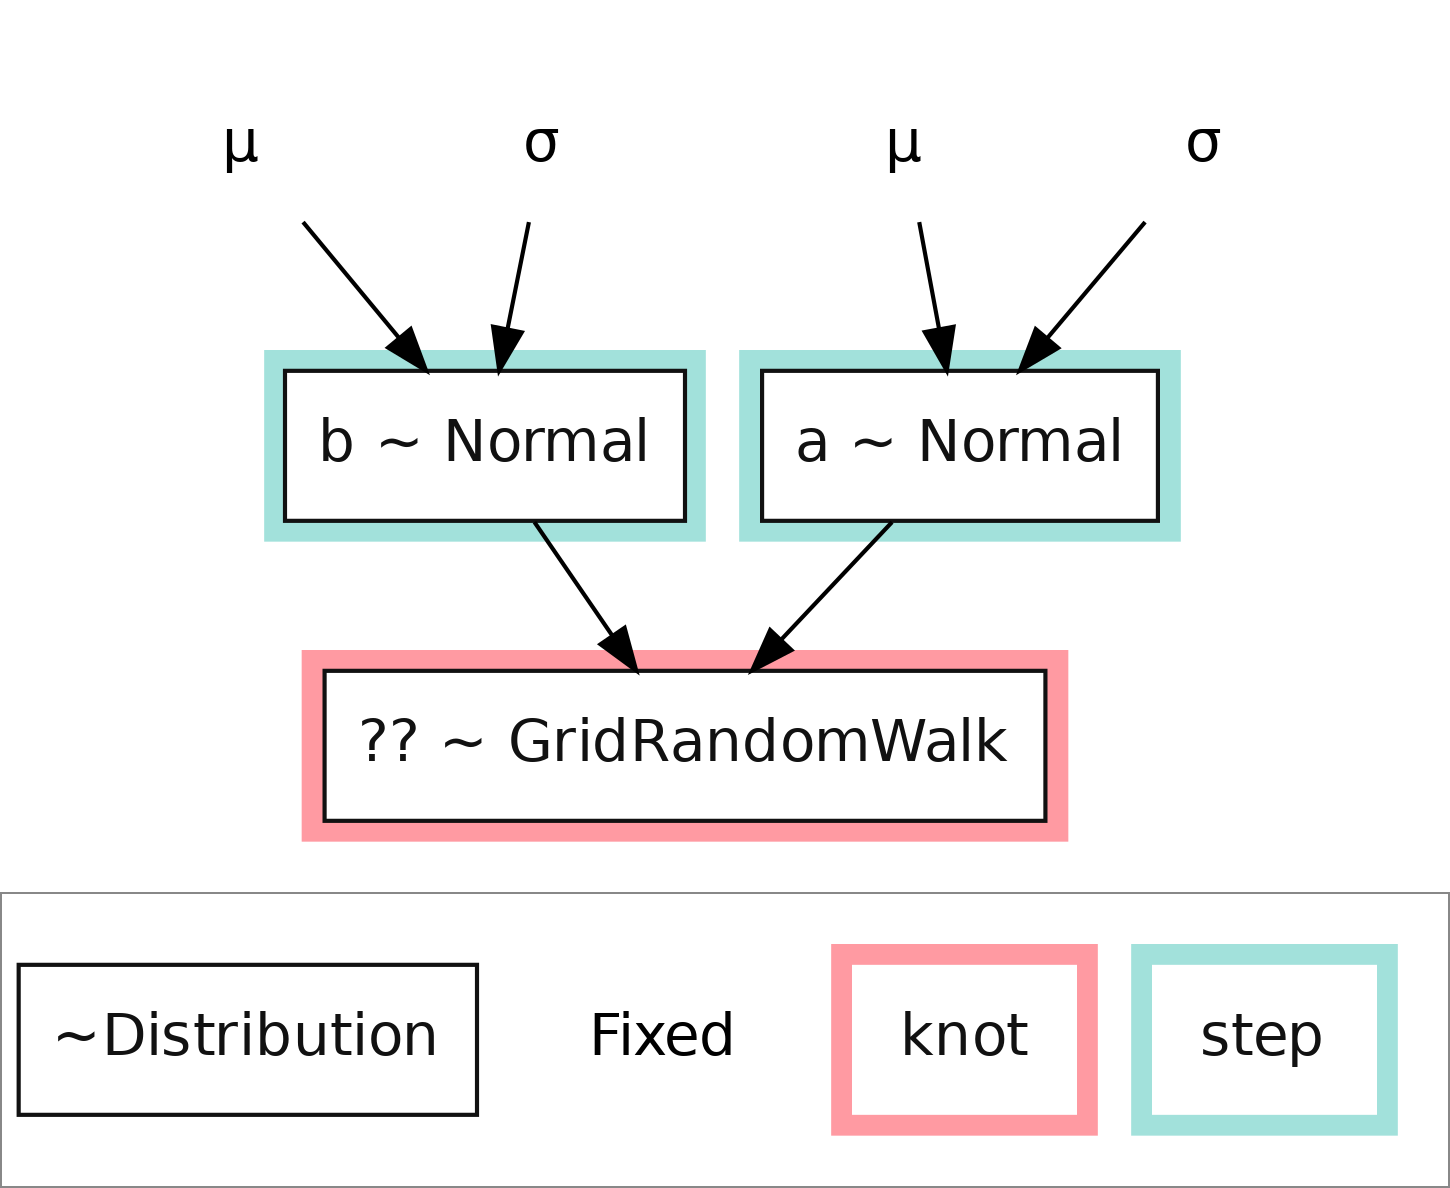

In [12]:
dist = la.distributions.GridRandomWalk(
     {"a":la.distributions.Normal(), "b":la.distributions.Normal()},
    n_knots = [10, 5],
    circular = [False, True])
dist.plot()

tensor([-1.7179, -3.4222, -4.2937, -5.0262, -3.1725,  0.8823,  1.9773,  2.8702,
        -0.0935,  0.2381, -0.3072,  0.8547,  0.6101, -2.5239, -2.1097,  1.6322,
         2.5090,  4.9472,  0.2487, -0.0182,  2.4291,  0.4158,  2.4569, -3.0492,
        -1.4357,  2.3193,  3.6747,  5.9682,  1.8250,  5.3124,  0.1234,  0.9802,
         2.8774, -1.7451,  0.5918,  3.1664,  2.2417,  3.0802, -0.3847,  0.2567,
         0.0536, -2.1666,  0.5970, -3.0605, -1.0314,  1.8857,  2.2824,  2.1430,
        -1.8551, -0.0798])
tensor([-444.6271])


<AxesSubplot:>

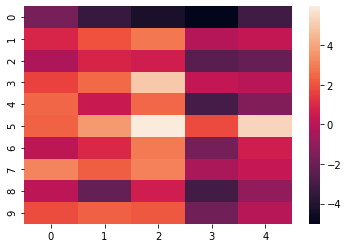

In [13]:
dist.reset_recursive()
dist.run_recursive()
print(dist.value)
print(dist.likelihood)
sns.heatmap(dist.value.reshape(dist.n_knots).cpu().numpy())

In [14]:
knots = torch.zeros(dist.n_knots)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
print(likelihood/np.log(scipy.stats.norm().pdf(0.)))
assert np.isclose(likelihood/np.log(scipy.stats.norm().pdf(0.)), 95)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([95.0000])


In [15]:
knots = torch.arange(dist.n_knots[0]).repeat(dist.n_knots[1], 1).T * 2 + \
    torch.arange(dist.n_knots[1]).repeat(dist.n_knots[0], 1)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
expected_steps = np.hstack([np.repeat(1., dist.n_knots[0] * (dist.n_knots[1] - 1)), np.repeat(4., dist.n_knots[0]), np.repeat(2., dist.n_knots[1] * (dist.n_knots[0] - 1))])
expected_likelihood = np.log(scipy.stats.norm().pdf(expected_steps)).sum()
    
assert np.isclose(likelihood, expected_likelihood)

tensor([[ 0,  1,  2,  3,  4],
        [ 2,  3,  4,  5,  6],
        [ 4,  5,  6,  7,  8],
        [ 6,  7,  8,  9, 10],
        [ 8,  9, 10, 11, 12],
        [10, 11, 12, 13, 14],
        [12, 13, 14, 15, 16],
        [14, 15, 16, 17, 18],
        [16, 17, 18, 19, 20],
        [18, 19, 20, 21, 22]])


## Thinplate (circular + normal)

In [16]:
n_cells = 2000
cell_ids = [str(i) for i in range(n_cells)]
cell_index = pd.Series(cell_ids, name = "cell")

In [17]:
x_value = pd.Series(np.linspace(0., 4., n_cells), index = cell_index)
x = la.Fixed(x_value, distribution = la.distributions.Uniform(0., 4.), label = "x", symbol = r"x")
x

x:  ↦ Fixed [cell (2000)]

In [18]:
weights = np.vstack([
    np.ones(n_cells),
    x_value**(2)
]).T
weights = weights / weights.sum(1)[:, None]
angle_samples = np.vstack([
    np.random.uniform(0, 2 * np.pi, n_cells),
    np.random.normal(0., 0.5, n_cells) % (2*np.pi)
]).T
angle_value = angle_samples[np.arange(weights.shape[0]), (np.random.rand(weights.shape[0]) > weights[:, 0]).astype(np.int32)]

angle_value = pd.Series(angle_value, index = cell_index)
angle = la.Fixed(angle_value, distribution = la.distributions.CircularUniform(), label = "angle", symbol = r"\theta")
angle

angle:  ↦ Fixed [cell (2000)]

/home/wsaelens/projects/probabilistic-cell/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

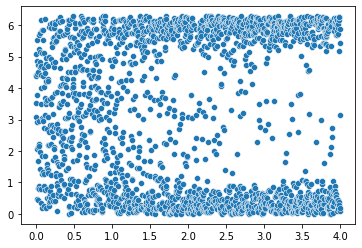

In [19]:
sns.scatterplot(x_value, angle_value)

### Toy data

In [20]:
observation_value_exact = pd.DataFrame(
    np.vstack([
        np.zeros(n_cells),
        np.sin(angle_value),
        x_value,
        np.sin(angle_value) + x_value,
        np.sin(angle_value) * x_value,
        np.sin(angle_value) * x_value - x_value,
        ((angle_value > 0) & (angle_value < 3) & (x_value < 2.)).astype(float)
    ]).T,
    index = cell_index,
    columns = ["nothing", "angle", "x", "angle + x", "angle * x", "angle * x - x", "complex"]
)
observation_value = observation_value_exact + np.random.normal(0., 1., observation_value_exact.shape)
# observation_value.columns = [str(i) for i in range(observation_value.shape[1])]
observation_value.columns.name = "feature"

features = la.Dim(observation_value.columns)

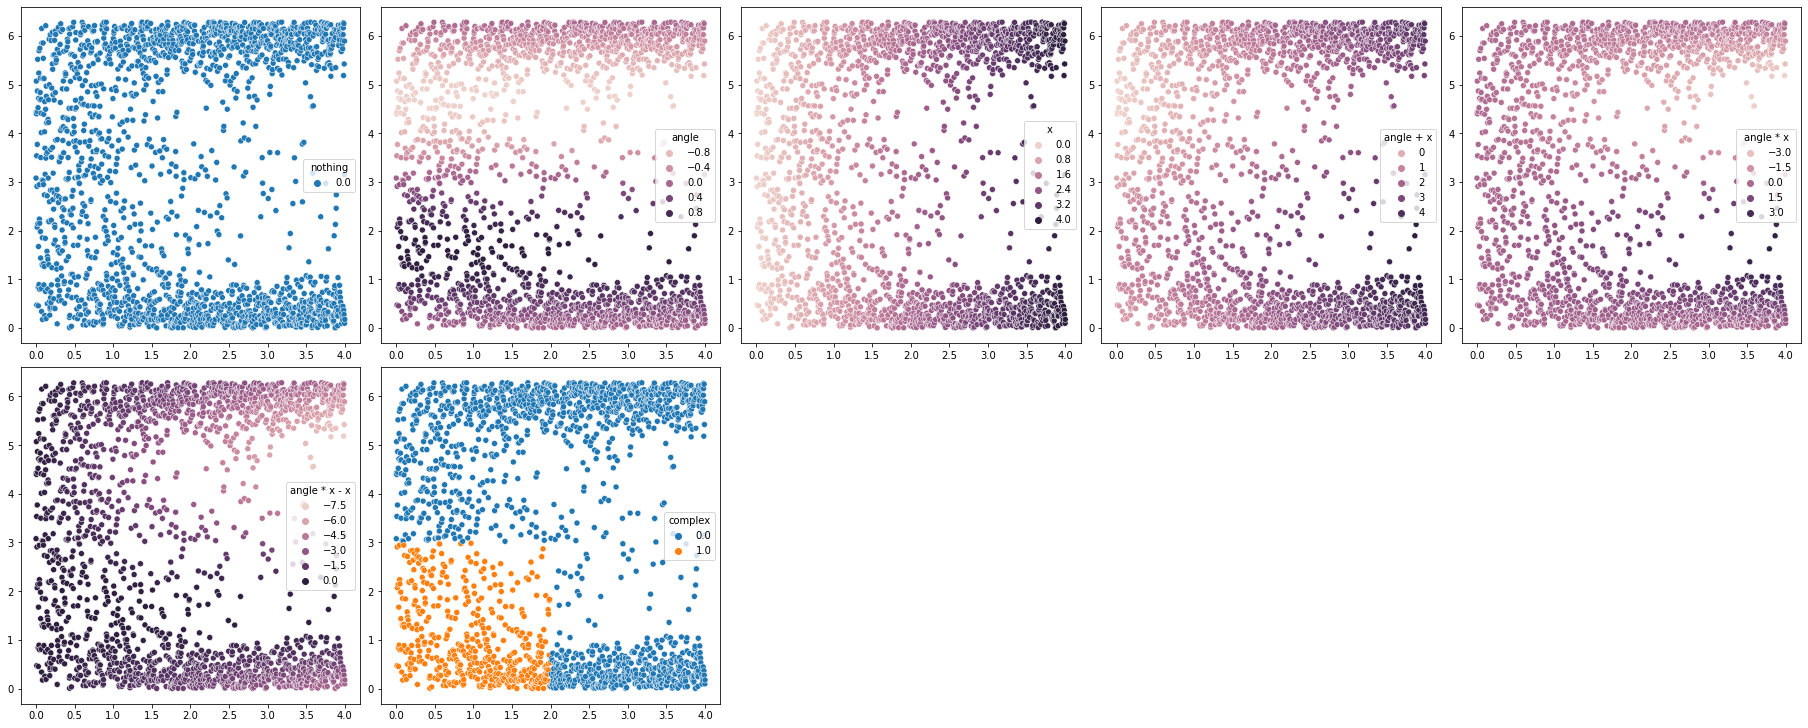

In [21]:
fig, axes = la.plotting.axes_wrap(observation_value_exact.shape[1])
for gene_id, ax in zip(observation_value_exact.columns, axes):
    sns.scatterplot(x = x_value, y = angle_value, hue = observation_value_exact[gene_id], ax = ax)

### Modelling

In [22]:
output_definition = la.Definition.from_xr(observation_value)
output_definition
output_distribution = la.distributions.Laplace()

In [23]:
models = {}

In [24]:
z = la.modular.Additive(intercept = la.Latent(la.distributions.Normal(), definition = la.Definition([features])), definition = output_definition.clone(), label = "z")
z.x_angle_effect = la.links.scalars.Thinplate(
    {"x":x, "angle":angle},
    output = output_definition,
    n_knots = 10,
    output_distribution = output_distribution,
    label = "x,angle",
    symbol = r"\{x,angle\}_effect"
)
z.empirical = xr.DataArray(observation_value)
s = la.Parameter(1.)
dist2 = la.distributions.Normal(loc = z, scale = s)
observation = la.Observation(observation_value, dist2, label = "observation")

models["thinplate"] = la.Model(observation)


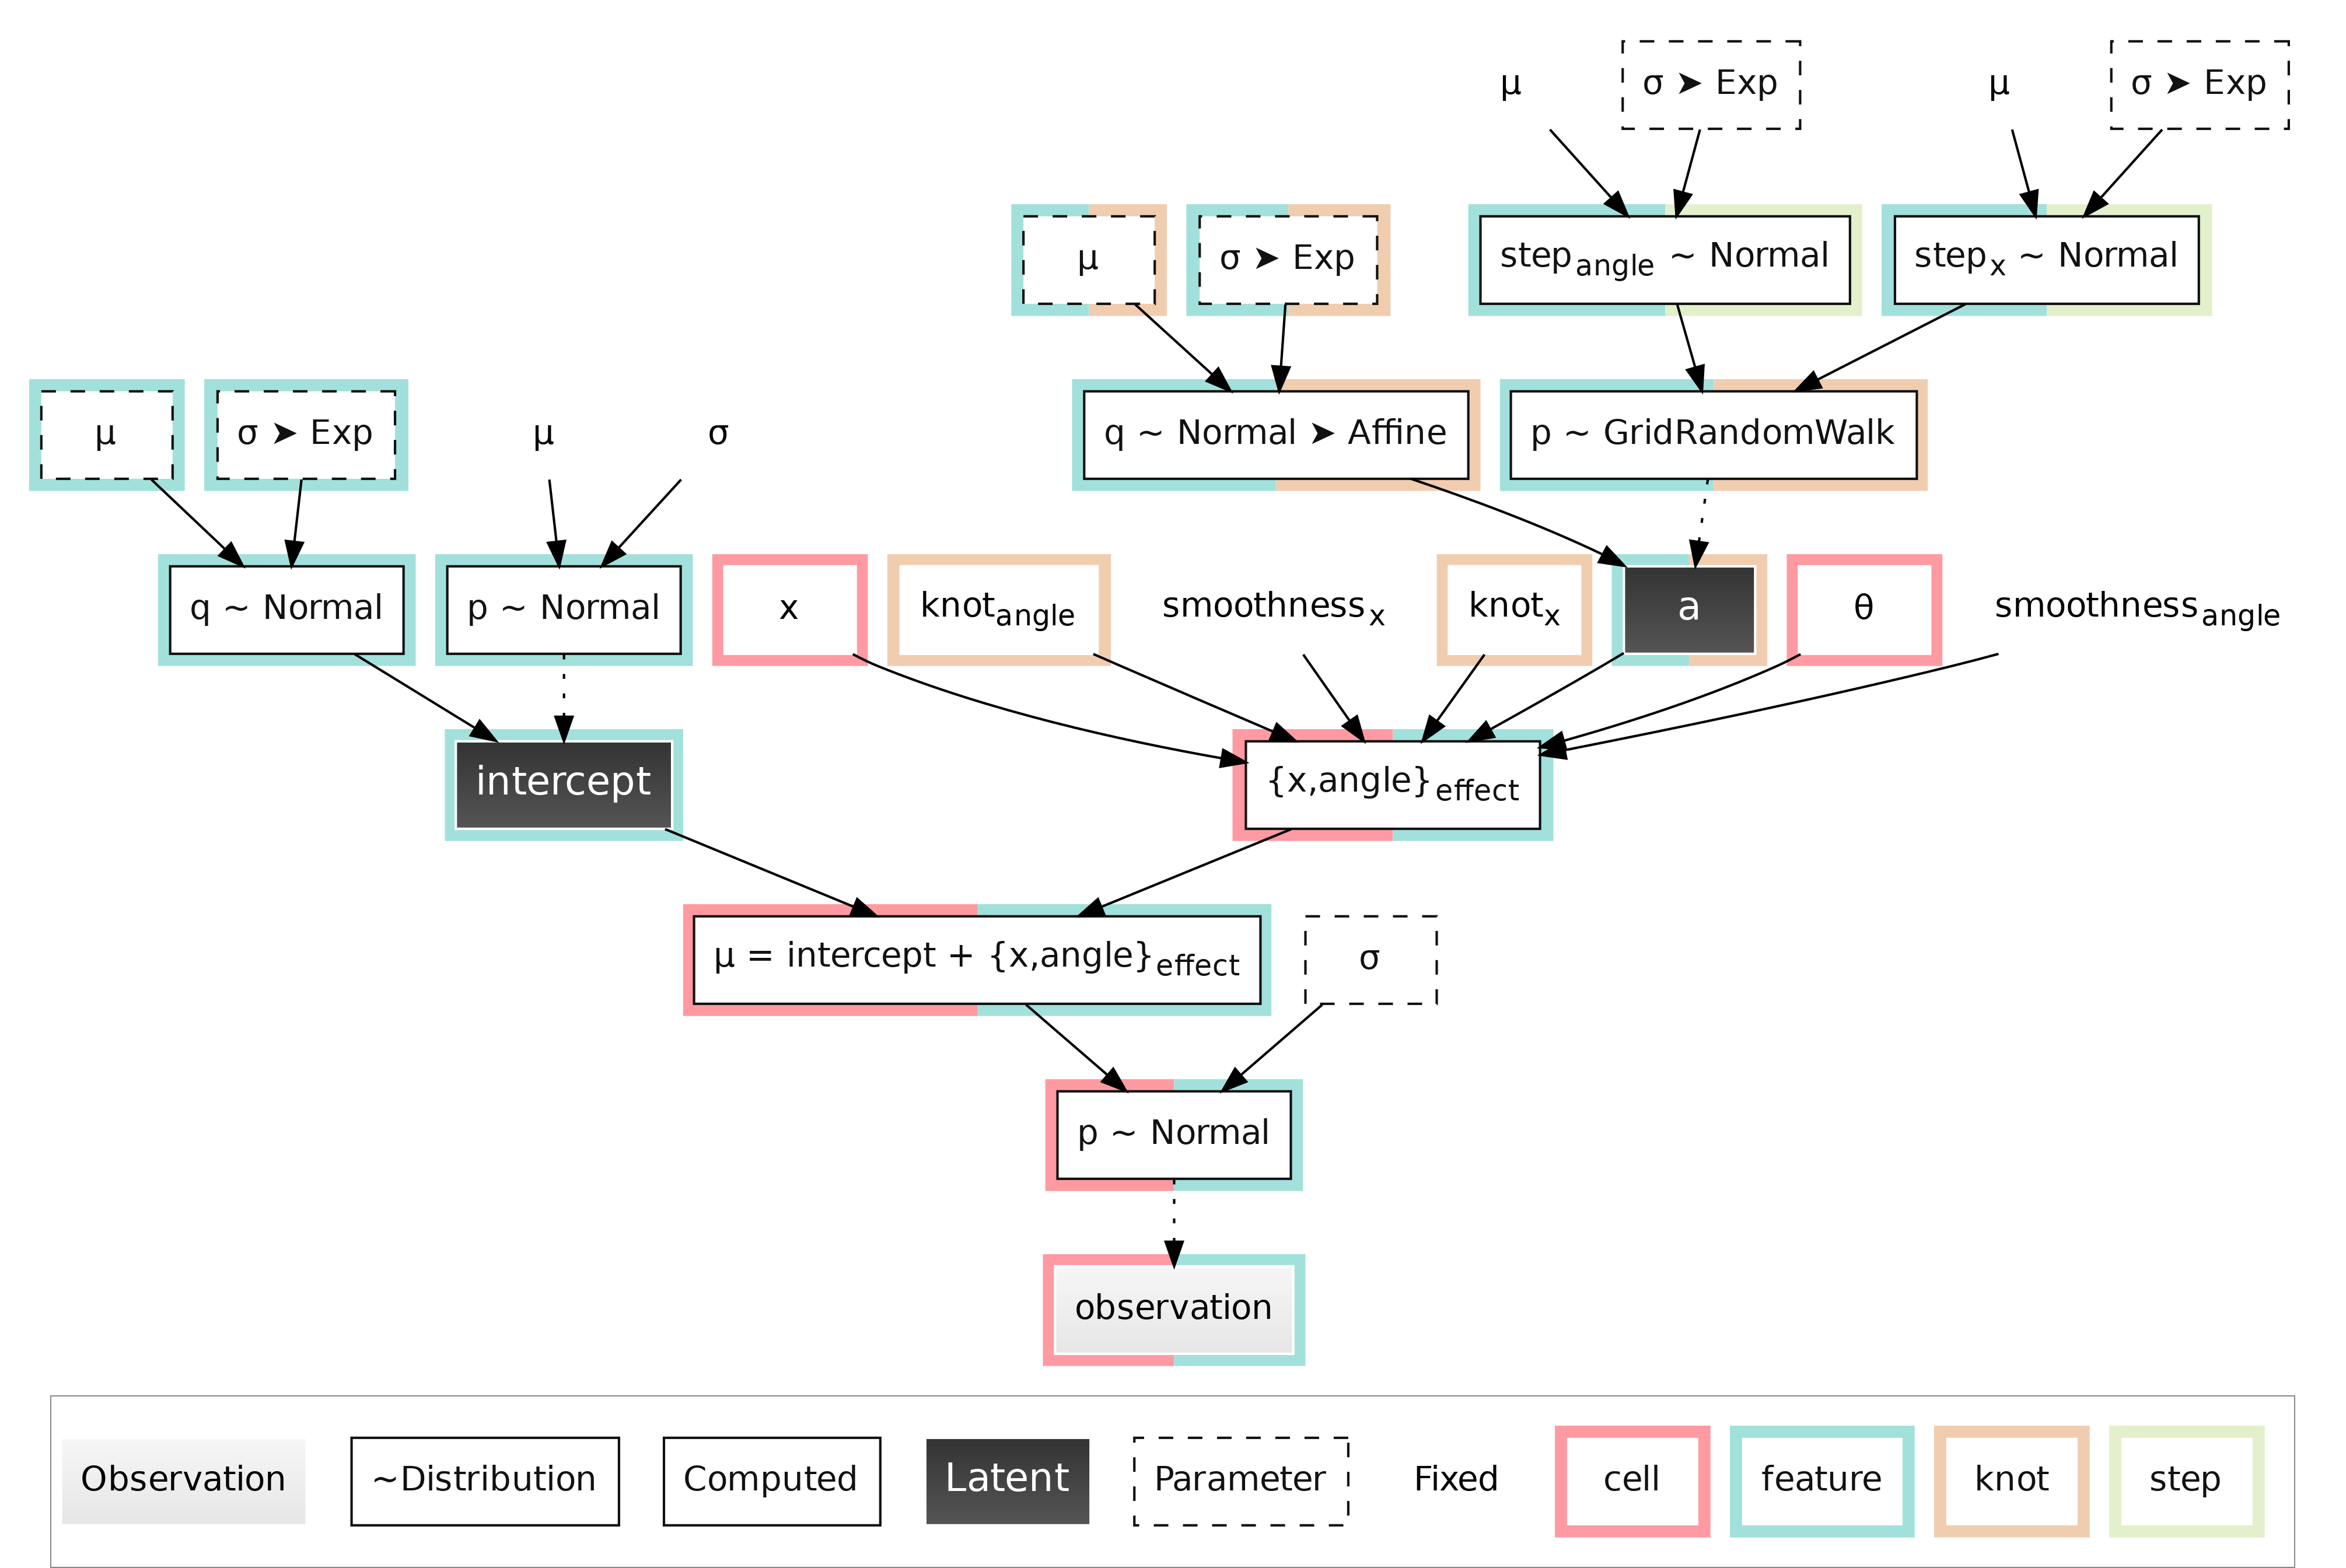

In [25]:
observation.plot()

In [28]:
z.x_angle_effect.a.p.step_angle

step_angle: loc, scale ↦ Normal [feature (7), step (90)]

In [29]:
z = models["thinplate"].find_recursive("z").clone()

x = z.find_recursive("x")
angle = z.find_recursive("angle")

z.x_effect = la.links.scalar.Spline(
    x,
    output = output_definition,
    n_knots = 10,
    step_distribution = la.distributions.Normal(z.x_angle_effect.a.p.step_x.loc, z.x_angle_effect.a.p.step_x.scale),
    output_distribution = output_distribution
)
z.angle_effect = la.links.scalar.CircularSpline(
    angle,
    output = output_definition,
    n_knots = 10,
    step_distribution = la.distributions.Normal(z.x_angle_effect.a.p.step_angle.loc, z.x_angle_effect.a.p.step_angle.scale),
    output_distribution = output_distribution
)
z.empirical = xr.DataArray(observation_value)
s = la.Parameter(1.)
dist2 = la.distributions.Normal(loc = z, scale = s)
observation = la.Observation(observation_value, dist2, label = "observation")

models["spline_thinplate"] = la.Model(observation)


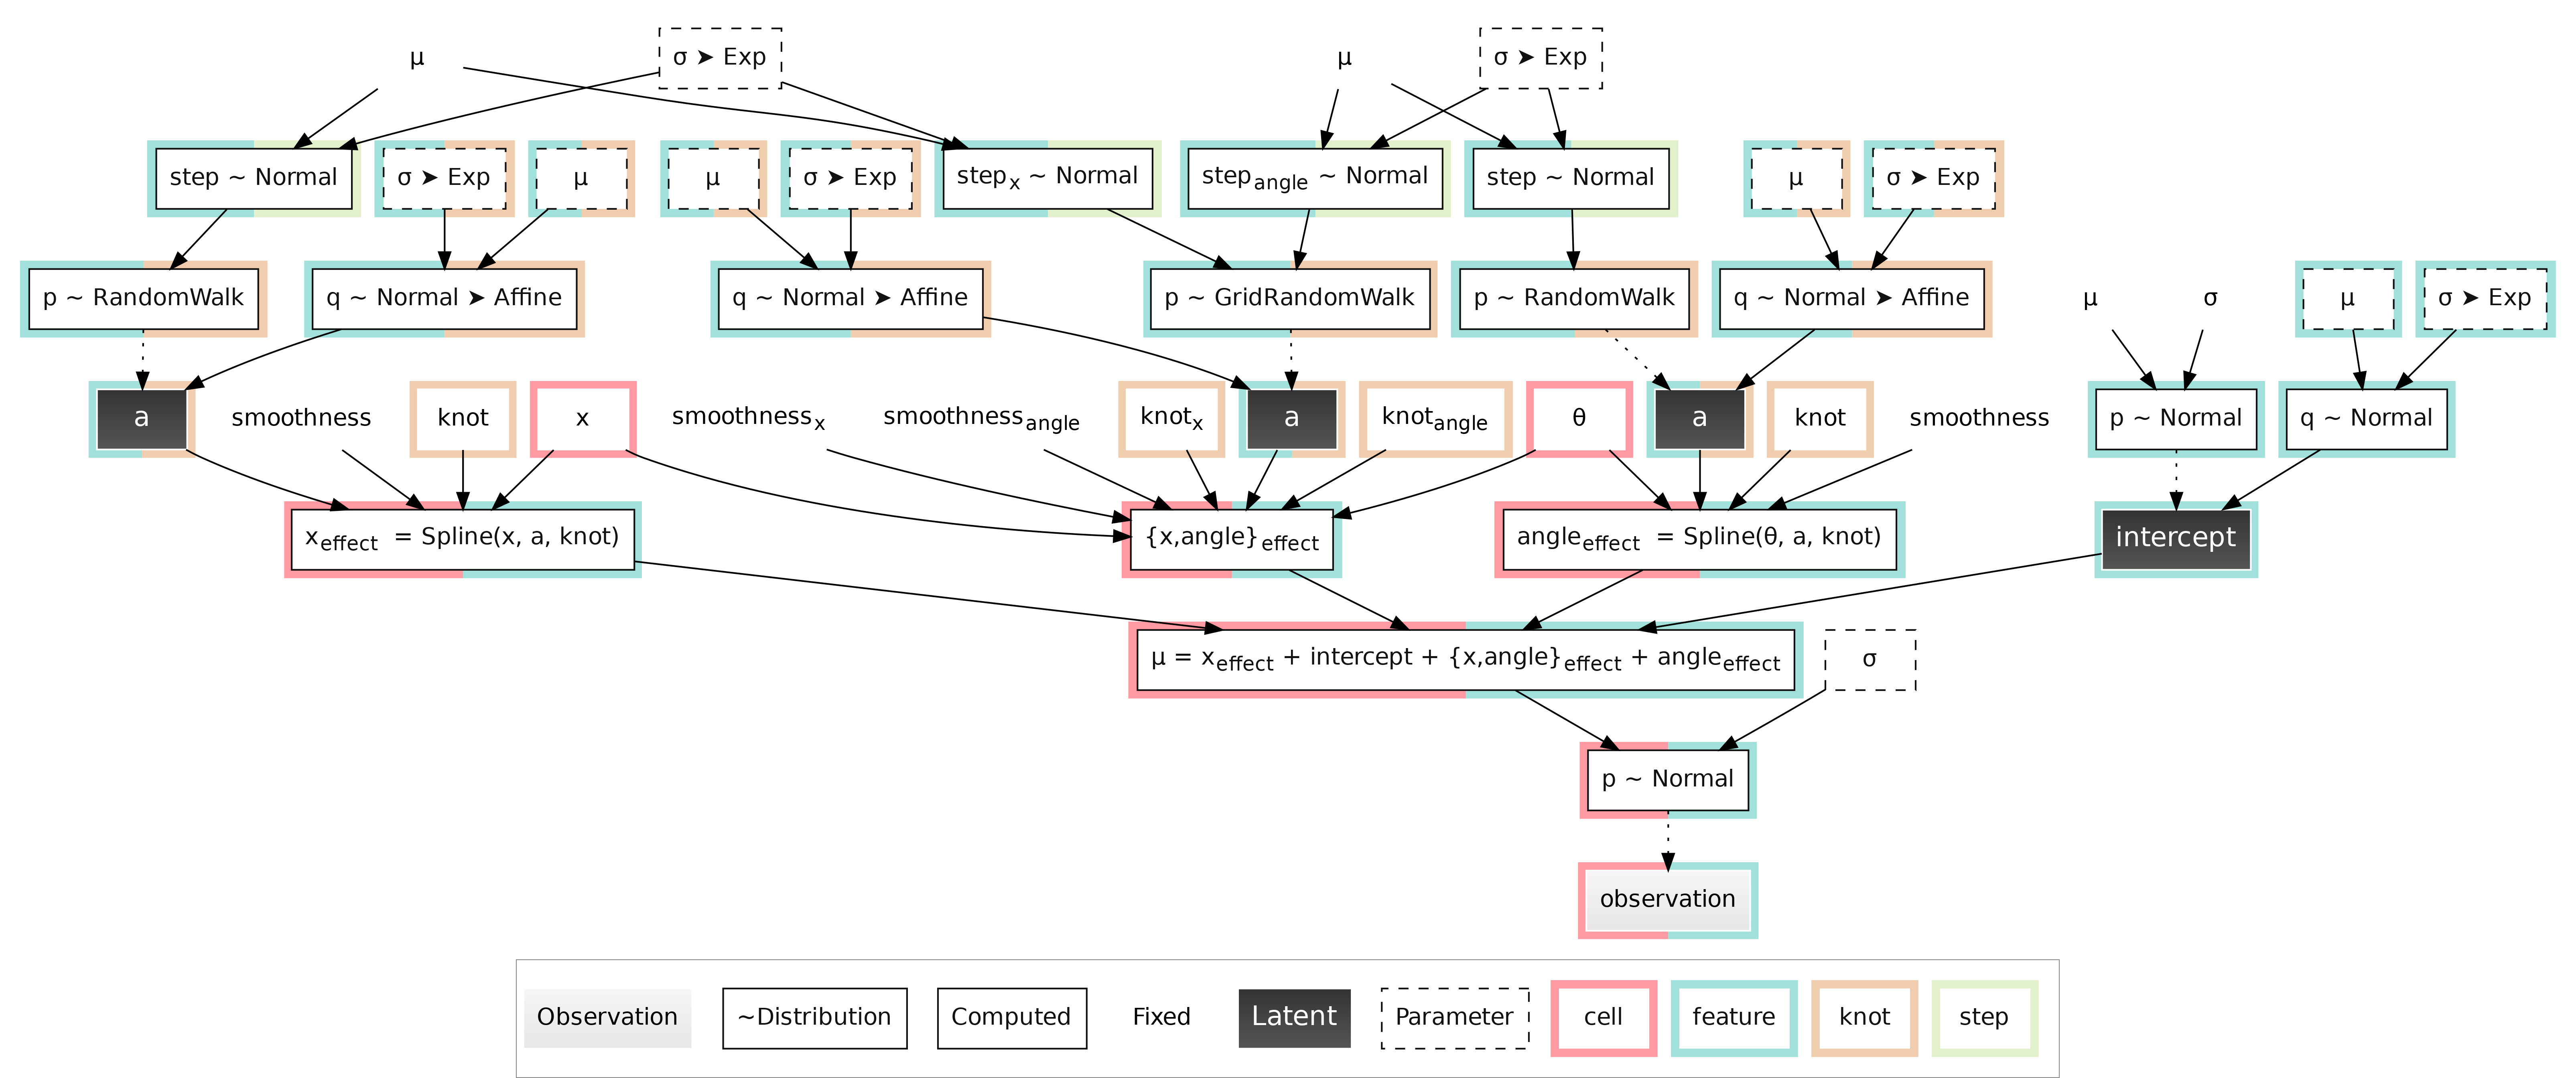

In [30]:
observation.plot()

In [31]:
# retrain = False
retrain = True
for model_id, model in models.items():
    print(model_id)
    if ("observed" not in model) or retrain:
        inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.01), subsamplers = {"cell":la.infer.subsampling.Subsampler(150)})
        trainer = la.infer.trainer.Trainer(inference)
        trace = trainer.train(10000)
        
        inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.01), subsamplers = {"cell":la.infer.subsampling.Subsampler(150)})
        trainer = la.infer.trainer.Trainer(inference)
        trace = trainer.train(10000)
        
        inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.01), subsamplers = {"cell":la.infer.subsampling.Subsampler(150)})
        trainer = la.infer.trainer.Trainer(inference)
        trace = trainer.train(10000)

thinplate


  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

spline_thinplate


  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

In [29]:
# retrain = True
for model_id, model in models.items():
    print(model_id)
    if ("observed" not in model) or retrain:
        model["observed"] = la.posterior.Observed(model.observation)
        model["observed"].sample(10)
        
        for id in ["causal_x", "causal_angle", "causal_x_angle"]:
            if id in model:
                del model[id]

thinplate


  0%|          | 0/10 [00:00<?, ?it/s]

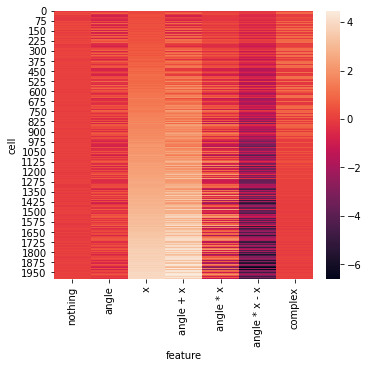

In [30]:
fig, axes = la.plotting.axes_wrap(len(models))
for ax, (model_id, model) in zip(axes, models.items()):
    sns.heatmap(model["observed"].samples[z].mean("sample").to_pandas(), ax = ax)

In [31]:
for model_id, model in models.items():
    print(model_id)
#     del model["causal"]
    x = model.find_recursive("x")
    if "causal_x" not in model:
        causal_x = la.posterior.scalar.ScalarVectorCausal(x, model.observation, observed = model["observed"])
        causal_x.sample(20)
        causal_x.sample_bootstrap(2)

        model["causal_x"] = causal_x
        
    angle = model.find_recursive("angle")
    if "causal_angle" not in model:
        causal_angle = la.posterior.scalar.ScalarVectorCausal(angle, model.observation, observed = model["observed"])
        causal_angle.sample(20)
        causal_angle.sample_bootstrap(2)

        model["causal_angle"] = causal_angle
        
    if "causal_x_angle" not in model:
        causal_x_angle = la.posterior.scalarscalar.ScalarScalarVectorCausal(model["causal_x"], model["causal_angle"])
        causal_x_angle.sample(100)

        model["causal_x_angle"] = causal_x_angle

thinplate


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_1752655/1754914083.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


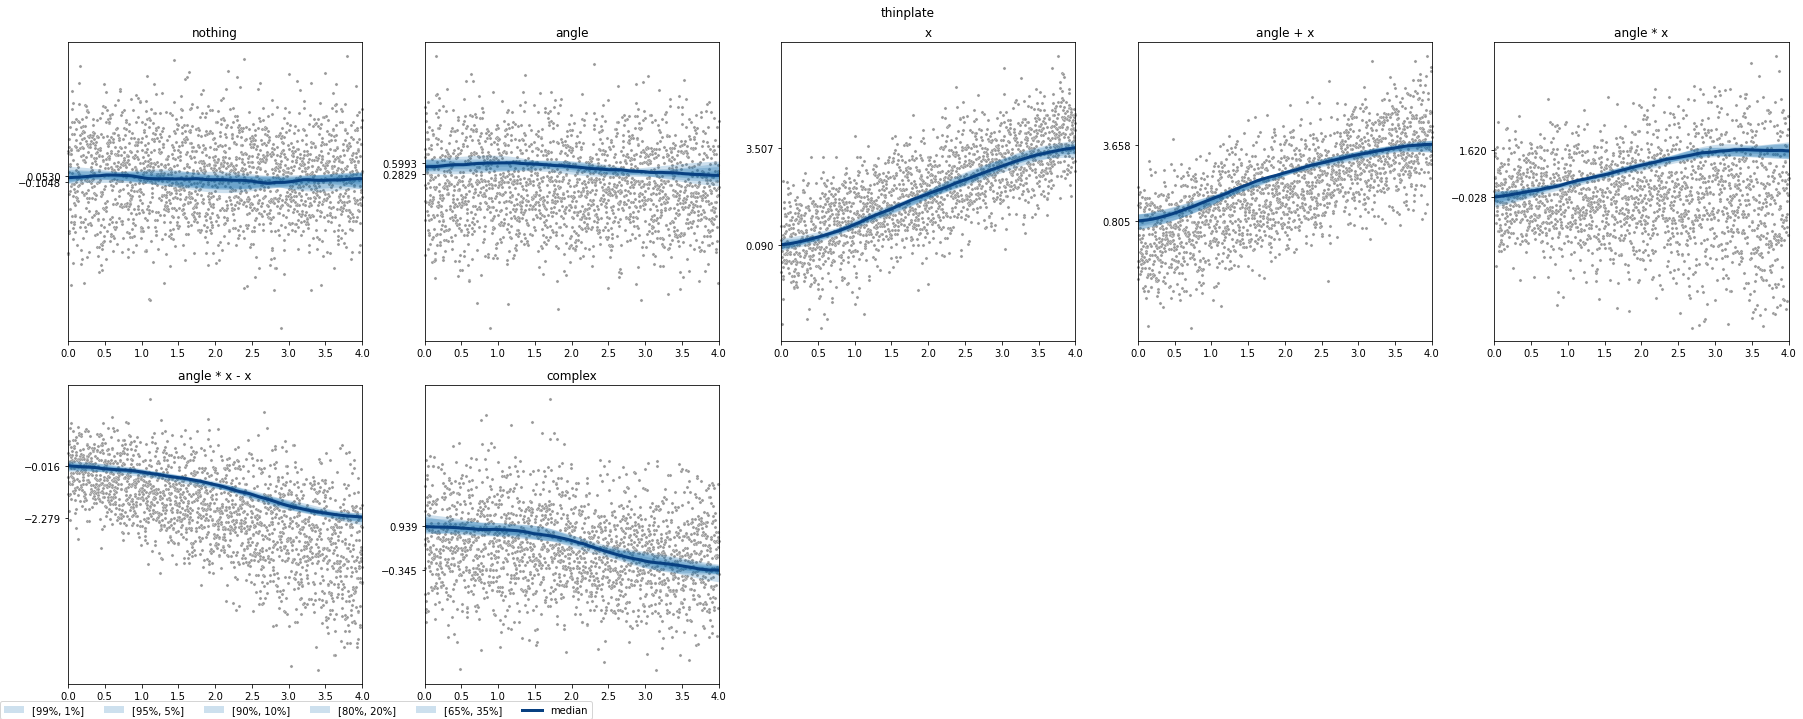

In [32]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig = model["causal_x"].plot_features(feature_ids = feature_ids);
    fig.suptitle(model_id)
    fig.tight_layout()

/tmp/ipykernel_1752655/2628398980.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


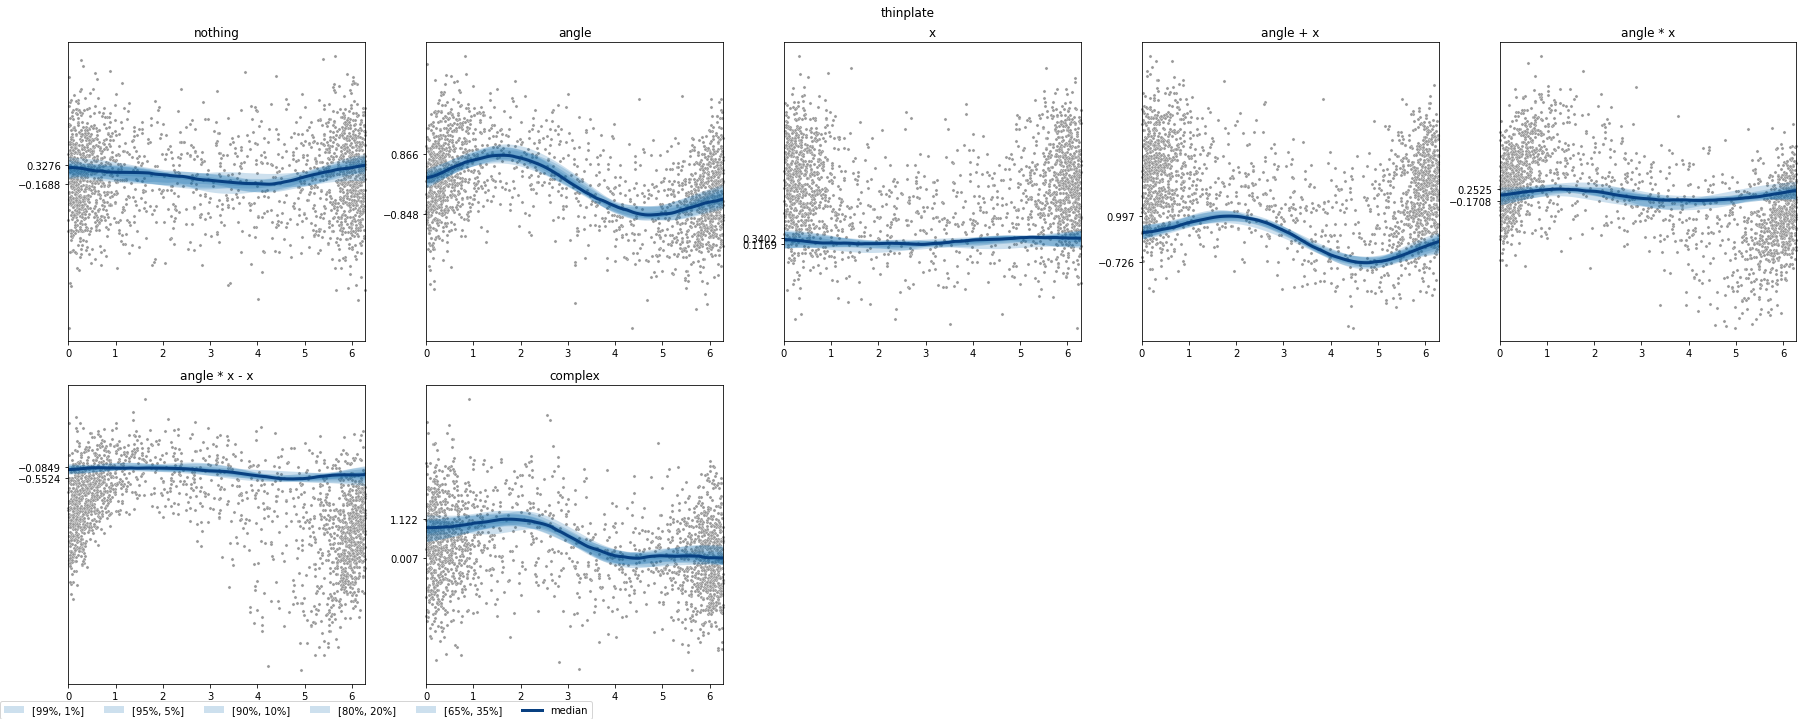

In [33]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig = model["causal_angle"].plot_features(feature_ids = feature_ids);
    fig.suptitle(model_id)
    fig.tight_layout()

/tmp/ipykernel_1752655/521722564.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


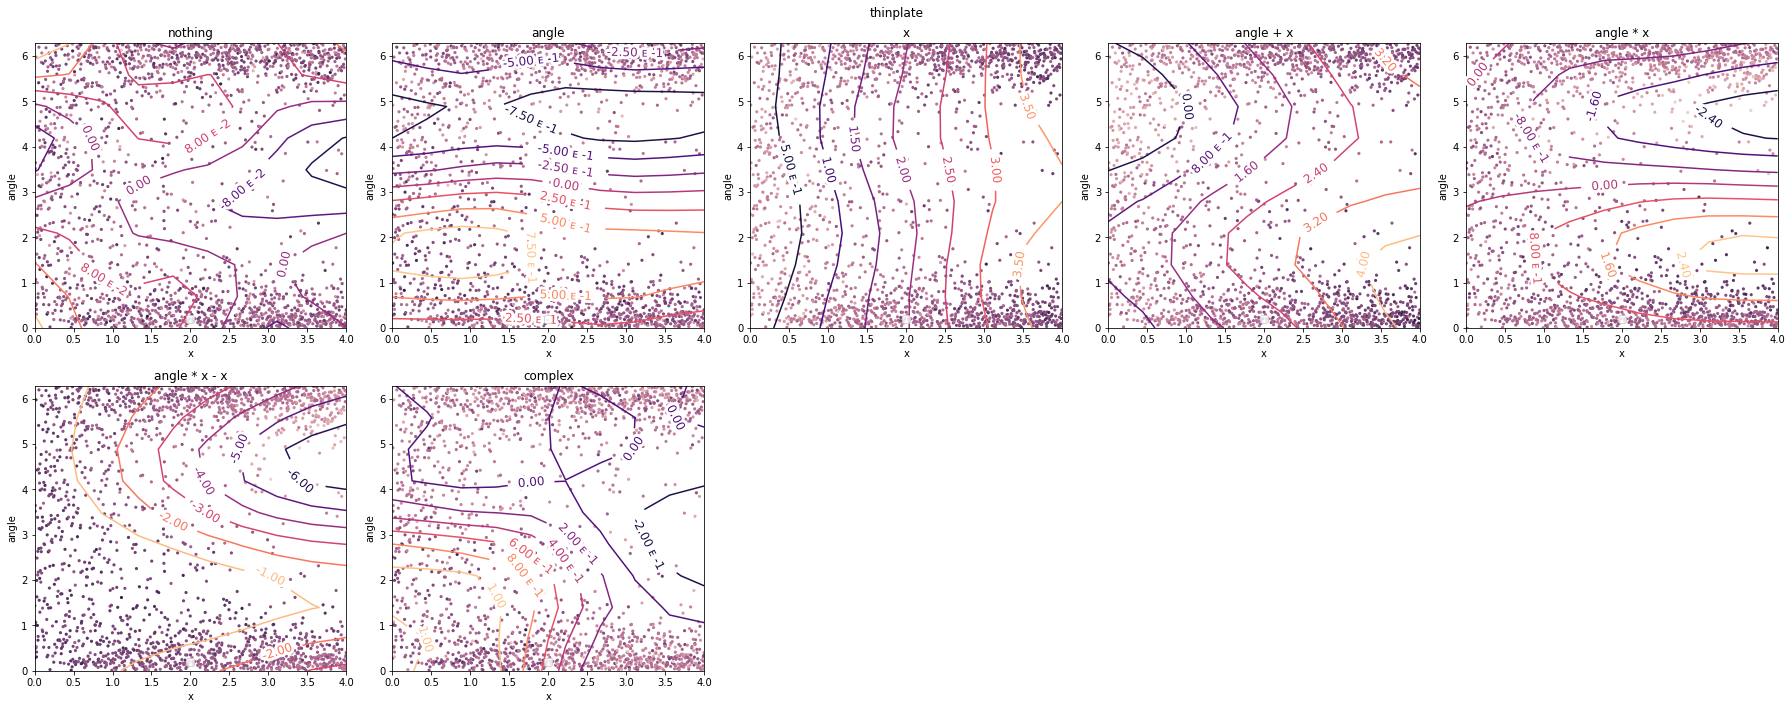

In [34]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig = model["causal_x_angle"].plot_features_contour(feature_ids = feature_ids);
    fig.suptitle(model_id)
    fig.tight_layout()

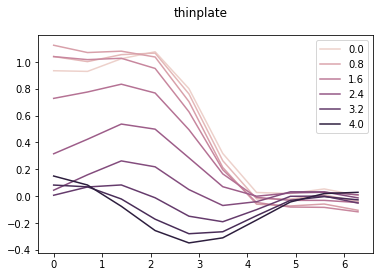

In [35]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig, ax = plt.subplots()
    feature = "complex"
    x_sample = model["causal_x_angle"].samples[model.observation.find_recursive("x")].mean("sample")
    angle_sample = model["causal_x_angle"].samples[model.observation.find_recursive("angle")].mean("sample")
    z_sample = model["causal_x_angle"].samples[model.observation.p.loc].mean("sample").sel(feature = feature)
    
    sns.lineplot(x = angle_sample.values, y = z_sample.values, hue = x_sample.values, ax = ax)
    fig.suptitle(model_id)

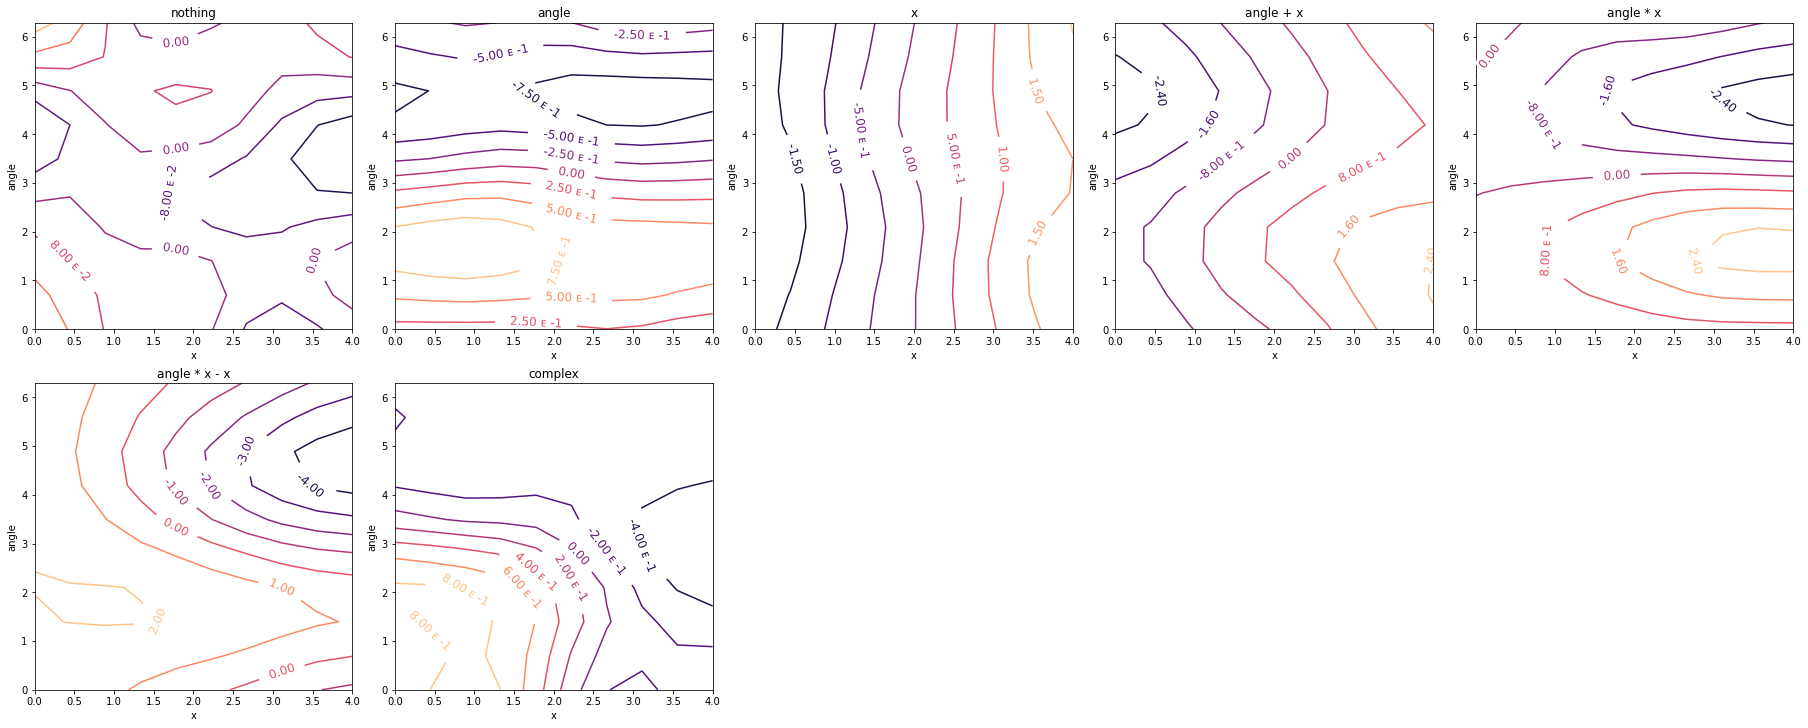

In [36]:
fig = model["causal_x_angle"].plot_features_contour(model.observation.p.loc.x_angle_effect, feature_ids = feature_ids);

In [37]:
fig = model["causal_x_angle"].plot_features_contour(model.observation.p.loc.angle_effect, feature_ids = feature_ids);

AttributeError: 'Additive' object has no attribute 'angle_effect'

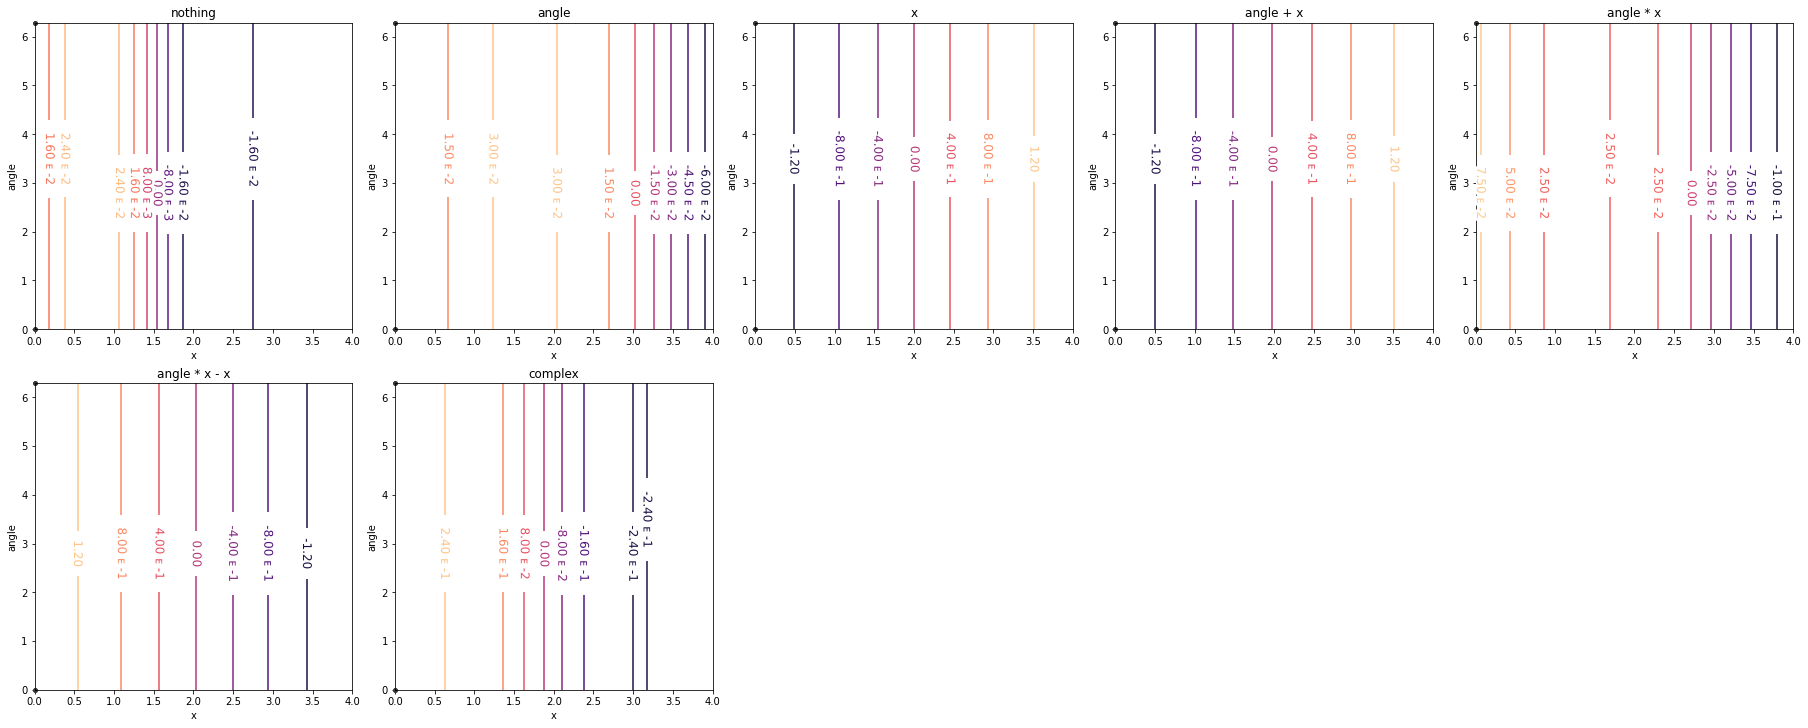

In [244]:
fig = model["causal_x_angle"].plot_features_contour(model.observation.p.loc.x_effect, feature_ids = feature_ids);